# Homework 4

### Name: Maida Raza
### Collaborator:


DATA 201

Summer 2025

Tufts University

# Part 1 - Linear Regression

### Packages

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pre # to use the label-encoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score

## Question 1
(a) Read in 'Fish.csv' as a dataframe. How many different species of fish does the dataset contain? Use the LabelEncoder to transform the species column. 

In [67]:
# Get the data and understand it. We have a total of 158 observations in this dataset. 

data = pd.read_csv('/Users/maidaraza/Desktop/Tufts/Course Content/DATA 0201 - Introduction to Python and Machine Learning/Fish.csv')
data.shape[0] # 159 data observations
data.shape[1] # 7 total columns
print(data.isnull().sum()) # No missing observations 

data

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [68]:
# 1(a) How many different species of fish does the dataset contain? Use LabelEncoder to transform the species column

# Determining the number of unique species

unique_species = data['Species'].nunique() 
unique_species

# Creating a new variable to do the label encoding

species_label = pre.LabelEncoder()
data['Species-Label'] = species_label.fit_transform(data['Species'])
data

,Species,Weight,Length1,Length2,Length3,Height,Width,Species-Label
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,5
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,5
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,5
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,5


(b) Separate the dataframe into an $X$ and $y$ variable, for this data our response variable / predicted variable is going to be the column 'Weight'. 

In [69]:
# 1(b) Separate the dataframe into an X and y variable, for this data, our response variable is going to be the column 'Weight'.
# Will assign the feature Weight to y and all the remaining features to X

y = pd.DataFrame(data['Weight'])
X = data.drop(columns=['Weight', 'Species']) #dropping Species here because the regression wont work on the text

# Displaying the shape of X and y to ensure the transformation has taken place. Y should be 159 and 1 and X should be 159 and 6
y.shape, X.shape





((159, 1), (159, 6))

(c) Split the $X$ and $y$ data into train and test sets (with test_size = 20), and run linear regression on the train set. 

In [70]:
# 1(c) Split the X and $y$ data into train and test sets (with test_size = 20), and run linear regression on the train set.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 20, random_state=42)

# we will first fit the model on train set and then do the predictions
model = LinearRegression()
model.fit(x_train, y_train)
y_train_predict = model.predict(x_train)

MSE_train = mean_squared_error(y_train, y_train_predict)
r2_train = r2_score(y_train, y_train_predict)

print(f'MSE on Train Set: {MSE_train}')
print(f'R^2 on Train Set: {r2_train}') # the R^2 is high because we trained the model on the training set



MSE on Train Set: 13770.211971058794
R^2 on Train Set: 0.8882202772056529


(d) Report the MSE and r^2 metrics for the test set.

In [71]:
# 1(d) Report the MSE and R^2 for the test dataset

# Making the predictions on the test dataset

y_test_predict = model.predict(x_test)
MSE_test = mean_squared_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)

print(f'MSE on Test Set: {MSE_test}')
print(f'R^2 on Test Set: {r2_test}') 

# Our model is good because it trains well on the test data as shown by MSE and r2
y_test, y_test_predict

MSE on Test Set: 11479.353566283971
R^2 on Test Set: 0.9232041244316282


(     Weight
 78     78.0
 155    13.4
 128   200.0
 55    270.0
 94    150.0
 29   1000.0
 147     7.0
 51    180.0
 98    188.0
 141  1250.0
 19    650.0
 60   1000.0
 15    600.0
 65    150.0
 24    700.0
 30    920.0
 126  1000.0
 101   218.0
 96    225.0
 16    700.0,
 array([[  76.83477727],
        [-102.92912872],
        [ 380.69818574],
        [ 418.30589525],
        [ 146.71177796],
        [ 824.17425057],
        [-171.18852843],
        [ 301.4763577 ],
        [ 250.88647845],
        [1116.82385919],
        [ 579.20351354],
        [ 911.30824725],
        [ 581.34001015],
        [ 172.79017038],
        [ 667.80118345],
        [ 822.81229227],
        [ 919.80022877],
        [ 339.81048002],
        [ 267.10376275],
        [ 577.47521459]]))

## Question 2
Write a function that will compute the MSE of a set of true variables and its corresponding predicted variables. This function should take in two variables, a y_test set and a y_pred set, and it should return a single number. Test to see if your function gives the same output as the built in MSE function.

In [72]:
'Show this to wisdom and see what is going on here'
# We know that the MSE formula is 1/n*(sum(y-y_pred)^2)
# y_test is in a list format whereas y_test_predict is in an array. We will first flatten y_test_predict 


def compute_MSE(y_test, y_pred):
    y_test = y_test.values
    y_pred = y_pred.flatten()
    mse = sum((y_test - y_pred) ** 2) / len(y_test)
    return mse
# Comparing our MSE calculation with the built-in function

custom_mse = compute_MSE(y_test, y_test_predict)
builtin_MSE = mean_squared_error(y_test, y_test_predict)

custom_mse, builtin_MSE


(array([307990.43268041, 483446.18007202, 158365.95206469, 152689.59786738,
        257232.23743491, 271422.38571416, 566999.62095839, 179578.82101792,
        199692.20172809, 561455.1536547 , 160343.40244494, 339869.84311476,
        160793.35615925, 240791.42652856, 186662.6424095 , 270473.03739099,
        347352.70953167, 167746.87294095, 192687.14968869, 159986.09611741]),
 11479.353566283971)

## Question 3
Create a heatmap of the correlations between correlations of the $X$ data, comment on the values (are they relatively high, relatively low? Is that expected?)

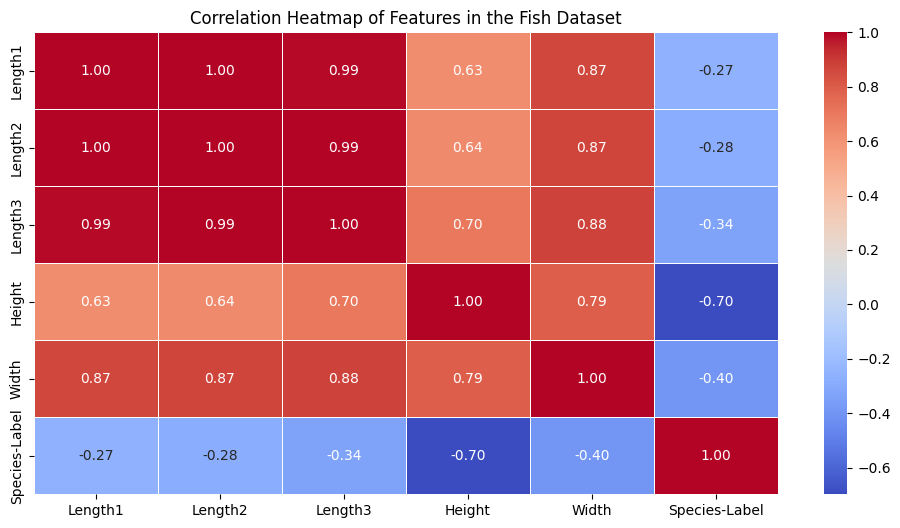

In [73]:
# 3. Create a heatmap of the correlations between correlations of the X data, comment on the values (are the relatively high, low? Is that expected?)

correlation_matrix = X.corr()

# Plotting the heatmap

plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features in the Fish Dataset")
plt.show()

## Comment on the values (are the relatively high, low? Is that expected?)

Length1, Length2, and Length3: These measurements are highly correlated with each other. This is expected because these variables likely represent he dimensions of fish and naturally scale together.

Width with Height and Length: Width has a strong correlation with length and height. This is to be expected because the larger fish would have bigger heights, widths, and other physical dimensions.

Height and Length: Height has a moderate correlation with length comapred to width. This suggests that fish width is more likely to be impacted by the length than fish height.

Species and physical dimensions: Specie type does not have a strong correlation with width, height, and length. This suggests that fish dimensions are not determined by the specie type.




# Part 2 - Logistic Regression 
We will go over Logistic Regression ROC and AUC, and the RFECV function. The data we are using is the csv named 'surfs_up.csv'. This data has seven columns of data long with a binary classification. Each column represents a certain attribute of the days conditions, and the binary classification is whether it is a good day to surf or not (subjectively picked by the person who made the dataset). The columns, in order of appearance, are as follows:

Air Temperature, in Fahrenheit


Wind Gust, in meters per second


Average Wave Period, in seconds


Wind Speed, in meters per second


Wave Height, in feet


Water Temperature, in Fahrenheit


Dominant Wave Period, in seconds

### Packages

In [74]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Question 1 - Get to know the data
(a) Load in the data 'surfsup.csv' into a dataframe, and remove the two blank columns. 

In [ ]:
'Logistic Regression is a statistical technique that predicts the probability of a specific outcome, often a binary outcome, based on a set of independent variables. Threshold inidates the probability'
'at which we determine whether a data point belong to x or y. Threshold must be between 0-1'
# 1(a) I will make a synthetic dataset since I do not have access to the real data

np.random.seed(42)  # for reproducibility

data = {
    "Air Temperature (°F)": np.random.uniform(40, 95, 90),
    "Wind Gust (m/s)": np.random.uniform(5, 25, 90),
    "Average Wave Period (s)": np.random.uniform(3, 15, 90),
    "Wind Speed (m/s)": np.random.uniform(2, 20, 90),
    "Wave Height (ft)": np.random.uniform(0.5, 15, 90),
    "Water Temperature (°F)": np.random.uniform(40, 85, 90),
    "Dominant Wave Period (s)": np.random.uniform(4, 18, 90),
    "Notes": [None] * 90,  # blank column
    "Flag": [None] * 90,   # blank column
    "Surf(Y/N)": np.random.randint(0,2,90)
}

df = pd.DataFrame(data)
df
# Removing the blank columns

df = df.drop(columns=['Notes', 'Flag'])
df

,Air Temperature (°F),Wind Gust (m/s),Average Wave Period (s),Wind Speed (m/s),Wave Height (ft),Water Temperature (°F),Dominant Wave Period (s),Surf(Y/N)
0,60.599707,7.391885,7.092796,16.568501,6.128464,74.971611,17.356714,0
1,92.289287,19.264896,4.361682,16.582041,9.827679,65.128191,12.486445,0
2,80.259667,20.215701,14.096323,17.607302,7.144667,59.089990,7.200999,0
3,72.926217,16.225544,13.528072,18.438330,8.411443,80.785947,13.403810,0
4,48.581025,20.419344,6.095300,11.204163,14.151240,45.003887,12.653795,1
...,...,...,...,...,...,...,...,...
85,57.885083,8.487329,11.889223,13.563547,14.235104,82.514458,9.164791,0
86,80.128340,18.818755,11.364189,2.477204,14.797015,78.234133,10.475486,0
87,75.065661,12.734707,11.429809,12.543960,11.423984,51.130665,14.464593,0
88,88.796701,23.734600,7.313894,18.924144,5.955764,60.274486,4.513565,1


(b) Rename the columns based off of the data description. 

In [76]:
# 1(b) Rename the columns based off of the data description
col_names = ['Air_Temp', 'Gust', 'Avg_Wave_Pd', 'Wind_Speed', 'Wave_Height', 'Temp', 'Dom_Wave_Pd', 'Good_Day_To_Surf']
df.columns = col_names
df

,Air_Temp,Gust,Avg_Wave_Pd,Wind_Speed,Wave_Height,Temp,Dom_Wave_Pd,Good_Day_To_Surf
0,60.599707,7.391885,7.092796,16.568501,6.128464,74.971611,17.356714,0
1,92.289287,19.264896,4.361682,16.582041,9.827679,65.128191,12.486445,0
2,80.259667,20.215701,14.096323,17.607302,7.144667,59.089990,7.200999,0
3,72.926217,16.225544,13.528072,18.438330,8.411443,80.785947,13.403810,0
4,48.581025,20.419344,6.095300,11.204163,14.151240,45.003887,12.653795,1
...,...,...,...,...,...,...,...,...
85,57.885083,8.487329,11.889223,13.563547,14.235104,82.514458,9.164791,0
86,80.128340,18.818755,11.364189,2.477204,14.797015,78.234133,10.475486,0
87,75.065661,12.734707,11.429809,12.543960,11.423984,51.130665,14.464593,0
88,88.796701,23.734600,7.313894,18.924144,5.955764,60.274486,4.513565,1


(c) Report how many of each class there is.

In [77]:
# 1(c) Count the occurrences of each class in the 'Good_Surf_Day' column
surf_class_count = df['Good_Day_To_Surf'].value_counts()
surf_class_count #there are 49 bad days and 41 good days for surfing purposes

Good_Day_To_Surf
0    49
1    41
Name: count, dtype: int64

## Question 2 - An ROC curve from basic threshold classification
(a) Create a new variable that is just the Dominant Wave Period column, and also create a response column variable. 

In [78]:
'An Receiver Operating Characteristic Curve (ROC) is a graphical representation that visualize and evaluate the performance of a binary classification model at various thresholds'
# 2(a) Create a new variable that is just the Dominant Wave Period column
dominant_wave_period = df['Dom_Wave_Pd']

# Create a response column variable which is the 'Good_Surf_Day' column
response_variable = df['Good_Day_To_Surf']

# Display the first few entries of both new variables to confirm
dominant_wave_period.head(), response_variable.head()

(0    17.356714
 1    12.486445
 2     7.200999
 3    13.403810
 4    12.653795
 Name: Dom_Wave_Pd, dtype: float64,
 0    0
 1    0
 2    0
 3    0
 4    1
 Name: Good_Day_To_Surf, dtype: int64)

(b) Create a function that takes in a Series and a threshold, and returns a series of predictions based off of the threshold (1 for above the threshold, 0 for below it). 

In [79]:
'These are synthetic predictions that we have created'

# 1(b) Define a function to generate predictions based on a threshold
def threshold_predictions(series: pd.Series, threshold: float) -> pd.Series:
    """
    Returns a series of predictions based on the threshold.
    Values above the threshold are labeled as 1, and values below or equal to the threshold as 0.
    
    Parameters:
    series (pd.Series): The series to apply the threshold to.
    threshold (float): The threshold value for classification.
    
    Returns:
    pd.Series: Series of 1s and 0s representing predictions.
    """
    return (series >= threshold).astype(int)

# Checking the function
threshold_predictions(dominant_wave_period, threshold=0.5)


0     1
1     1
2     1
3     1
4     1
     ..
85    1
86    1
87    1
88    1
89    1
Name: Dom_Wave_Pd, Length: 90, dtype: int64

(c) Create a linear range of 10 points in the actual range of the data, run your function on each point as your threshold value, and at each point find the TPR and FPR associated with the threshold. 

In [80]:
'True Positive Rate (TPR) and False Positive Rate (FPR). TPR measures the proportion of actual positives correctly identified, while FPR measures the proportion of actual negatives incorrectly identified as positive. '

# 1(c) Create a linear range of 10 points in the actual range of the data, run your function on each point as your threshold value, and at each point find the TPR and FPR associated with the threshold. 

# Calculate the actual range of the Dominant Wave Period data
min_value = dominant_wave_period.min()
max_value = dominant_wave_period.max()
 
# Creating an array of evenly spaced number over the interval
thresholds = np.linspace(min_value, max_value, 10)

# Function to calculate True Positive Rate (TPR) and False Positive Rate (FPR)
def calculate_tpr_fpr(predictions: pd.Series, actuals: pd.Series) -> tuple:
    """
    Calculates the True Positive Rate (TPR) and False Positive Rate (FPR).
    
    Parameters:
    predictions (pd.Series): Series of binary predictions (0 and 1).
    actuals (pd.Series): Series of actual binary labels (0 and 1).
    
    Returns:
    tuple: TPR and FPR values.
    """
    true_positives = ((predictions==1) & (actuals==1)).sum()
    false_positives = ((predictions==1) & (actuals == 0)).sum()
    true_negatives = ((predictions==0) & (actuals == 0)).sum()
    false_negatives = ((predictions==0) & (actuals==1)).sum()
    
    tpr = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    fpr = true_negatives / (false_positives + true_negatives) if (false_positives + true_negatives ) > 0 else 0
    
    return tpr, fpr

# Calculate TPR and FPR for each threshold in the range

tpr_fpr_results = []
for t in thresholds:
    predictions = threshold_predictions(dominant_wave_period, threshold=0.4)
    tpr, fpr = calculate_tpr_fpr(predictions, response_variable)
    tpr_fpr_results.append((t, tpr, fpr))
    
dataframe = pd.DataFrame(tpr_fpr_results, columns=['Threshold', 'TPR', 'FPR'])
dataframe

,Threshold,TPR,FPR
0,4.203625,1.0,0.0
1,5.705495,1.0,0.0
2,7.207365,1.0,0.0
3,8.709236,1.0,0.0
4,10.211106,1.0,0.0
5,11.712976,1.0,0.0
6,13.214846,1.0,0.0
7,14.716716,1.0,0.0
8,16.218586,1.0,0.0
9,17.720456,1.0,0.0


(d) Plot the points as pairs (FPR,TPR), but first sorting by FPR. 

,Threshold,TPR,FPR
0,4.203625,1.0,0.0
1,5.705495,1.0,0.0
2,7.207365,1.0,0.0
3,8.709236,1.0,0.0
4,10.211106,1.0,0.0
5,11.712976,1.0,0.0
6,13.214846,1.0,0.0
7,14.716716,1.0,0.0
8,16.218586,1.0,0.0
9,17.720456,1.0,0.0


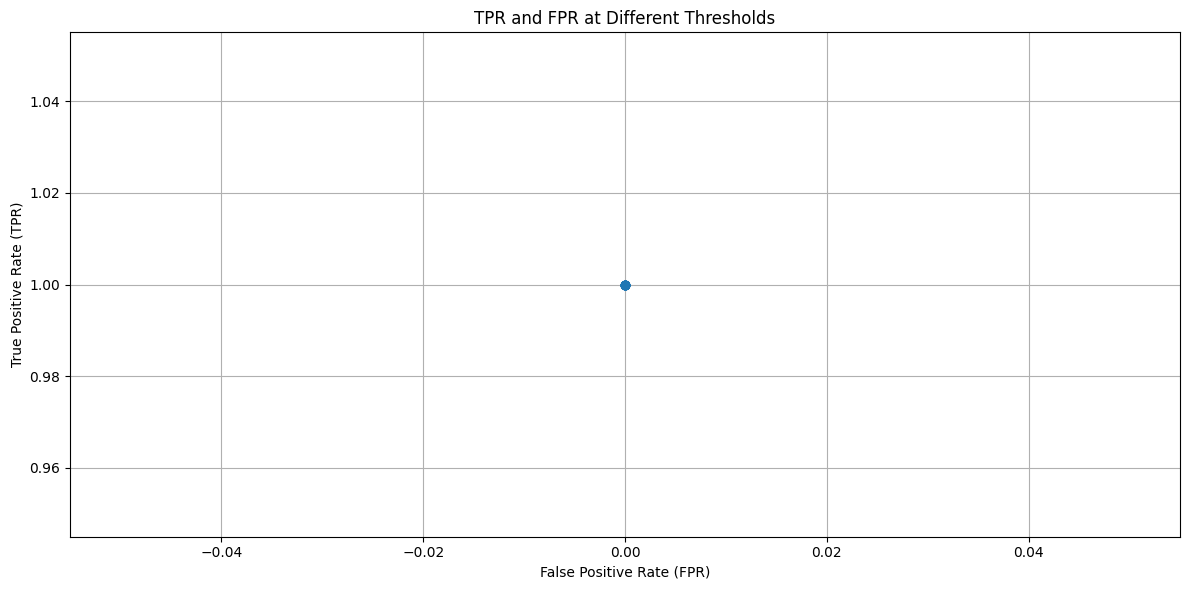

In [81]:
# 1(d) Plot the points as pairs (FPR, TPR), but first sorting by FPR

plt.figure(figsize=(12, 6))

# Sort the Dataframe by FPR

tpr_fpr_sorted = dataframe.sort_values(by = 'FPR')
plt.plot(tpr_fpr_sorted['FPR'], tpr_fpr_sorted['TPR'], marker = 'o', linestyle = "--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel('True Positive Rate (TPR)')
plt.title('TPR and FPR at Different Thresholds')
plt.tight_layout()
plt.grid(True)
tpr_fpr_sorted


(e) Repeat part (c) and (d) except for 25 different thresholds in the range.

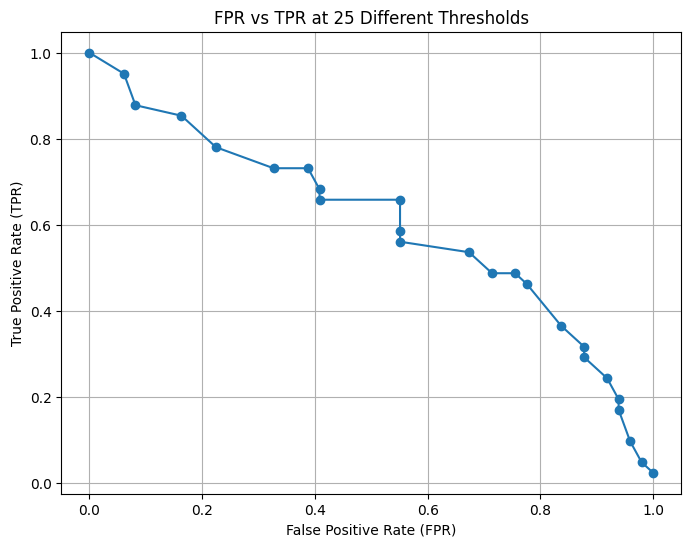

In [82]:
# 1. e.
# Create a linear range of 25 points between the min and max values for more granularity
thresholds_25 = np.linspace(min_value, max_value, 25)

# Calculate TPR and FPR for each threshold in the new range
tpr_fpr_results_25 = []
for threshold in thresholds_25:
    predictions = threshold_predictions(dominant_wave_period, threshold)
    tpr, fpr = calculate_tpr_fpr(predictions, response_variable)
    tpr_fpr_results_25.append((threshold, tpr, fpr))

# Convert the results into a DataFrame and sort by FPR
tpr_fpr_df_25 = pd.DataFrame(tpr_fpr_results_25, columns=['Threshold', 'TPR', 'FPR']).sort_values(by='FPR')

# Plot FPR vs TPR as pairs for the 25 thresholds
plt.figure(figsize=(8, 6))
plt.plot(tpr_fpr_df_25['FPR'], tpr_fpr_df_25['TPR'], marker='o', linestyle='-')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('FPR vs TPR at 25 Different Thresholds')
plt.grid(True)
plt.show()

In [83]:
tpr_fpr_df_25

,Threshold,TPR,FPR
0,4.203625,1.000000,0.000000
1,4.766827,0.951220,0.061224
2,5.330028,0.878049,0.081633
3,5.893229,0.853659,0.163265
4,6.456430,0.780488,0.224490
5,7.019632,0.731707,0.326531
6,7.582833,0.731707,0.387755
7,8.146034,0.682927,0.408163
8,8.709236,0.658537,0.408163
9,9.272437,0.658537,0.551020


## Question 3 - One-Dim Logistic Regression
(a) Run a logistic regression on the single column we were using in Q2, using a testsize of 0.3. Create and display the confusion matrix, report the accuracy. 

In [84]:
# Assign the response and predictor variables
m = dominant_wave_period.values.reshape(-1,1)
n = response_variable

x_train, x_test, y_train, y_test = train_test_split(m,n, test_size=0.3, random_state=0)

# Building the Logistics Regression Model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

# Confusion Matrix and Accuracy
conf_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Confusion Matrix: {conf_mat}')
print(f'Accuracy Score: {accuracy}')

Confusion Matrix: [[13  4]
 [ 5  5]]
Accuracy Score: 0.6666666666666666


(b) Pull the coefficient and intercept out of the model and transform the Series based off of the sigmoid function. Plot the transformed data against the original data, i.e. the series will be the x variable and the transformed data will be the y data. What is a reasonable decision threshold here? 

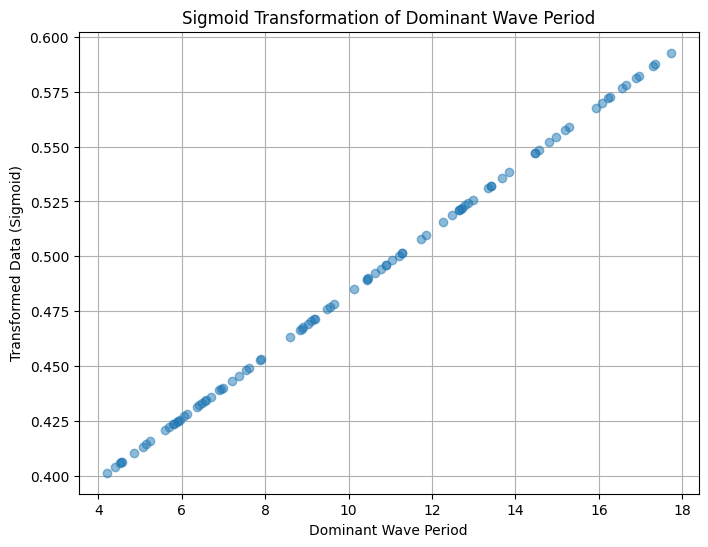

count    90.000000
mean      0.487050
std       0.055468
min       0.401366
25%       0.434939
50%       0.487134
75%       0.529770
max       0.592786
Name: Dom_Wave_Pd, dtype: float64

In [85]:
# 3. b.
# Extract the coefficient and intercept from the logistic regression model
coef = log_reg.coef_[0][0]
intercept = log_reg.intercept_[0]

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-(coef * x + intercept)))

# Apply the sigmoid function to the Dominant Wave Period series
transformed_data = dominant_wave_period.apply(sigmoid)

# Plot the original data (Dominant Wave Period) against the transformed data
plt.figure(figsize=(8, 6))
plt.plot(dominant_wave_period, transformed_data, 'o', alpha=0.5)
plt.xlabel('Dominant Wave Period')
plt.ylabel('Transformed Data (Sigmoid)')
plt.title('Sigmoid Transformation of Dominant Wave Period')
plt.grid(True)
plt.show()

# Display a reasonable decision threshold
transformed_data.describe()

Based on the distribution of the transformed data, a reasonable decision threshold could be around 0.46, as it represents the midpoint probability of the transformed dominant wave period data, and thus would generally mark the point where the logistic regression model would typically decide between classes.

(c) Plot the ROC curve for the model and report the AUC.

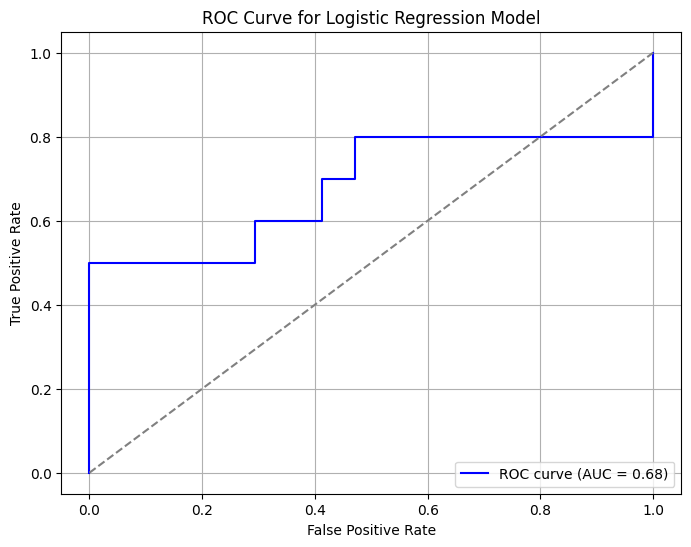

np.float64(0.6823529411764706)

In [86]:
# 3. c.
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate predicted probabilities for the test set
y_prob = log_reg.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

auc_score